In [ ]:
!git clone https://github.com/bochendong/few_shot_classification.git

Cloning into 'few_shot_classification'...
remote: Enumerating objects: 13216, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 13216 (delta 31), reused 47 (delta 17), pack-reused 13152 (from 1)
Receiving objects: 100% (13216/13216), 437.31 MiB | 17.45 MiB/s, done.
Resolving deltas: 100% (487/487), done.
Updating files: 100% (29045/29045), done.


# vgg(pretrained=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data paths
train_dir = '/content/few_shot_classification/code/train'
val_dir = '/content/few_shot_classification/code/val'

# Data transformations (image preprocessing)
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),          # Resize image dimensions
    # transforms.RandomHorizontalFlip(),         # Random horizontal flip
    # transforms.RandomRotation(10),             # Random rotation (angle range: -15 to 15 degrees)
    # transforms.RandomCrop(120),               # Randomly crop part of the image (120x120)
    # transforms.RandomResizedCrop(128, scale=(0.8, 1.0)),  # Random resized crop
    # transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Random translation (10%)
    # transforms.RandomPerspective(distortion_scale=0.2, p=0.5), # Random perspective distortion
    # transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)), # Gaussian blur
    transforms.ToTensor(),                  # Convert image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

val_transforms = transforms.Compose([
    transforms.Resize((128, 128)),          # Resize image dimensions
    transforms.ToTensor(),                  # Convert image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])

# Load data using ImageFolder
train_dataset = ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = ImageFolder(root=val_dir, transform=val_transforms)

# Check the number of classes
print(len(train_dataset.classes))
print(train_dataset.classes)  # Print the list of class names

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

클래스 레이블: ['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidok

In [ ]:
model = models.vgg16(pretrained=False)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes) # with this line
model.aux_logits = False
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# set loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
dataloaders_dict = {'train': train_loader, 'val': val_loader}

# Verify operation
batch_iterator = iter(dataloaders_dict['train'])
inputs, labels = next(batch_iterator)

# Load pretrained VGG-16 model
# Create an instance of VGG-16
use_pretrained = False
net = models.vgg16(pretrained=use_pretrained)

# Modify the last layer of the classifier to output 150 classes
net.classifier[6] = nn.Linear(in_features=4096, out_features=150)

# Set the model to training mode
net.train()

# Define the loss function
criterion = nn.CrossEntropyLoss()

params_to_update = []

# Parameters to train
update_param_names = ['classifier.6.weight', 'classifier.6.bias']

# Set requires_grad=False for all parameters except those to be updated
for name, param in net.named_parameters():
    if name in update_param_names:
        param.requires_grad = True
        params_to_update.append(param)
        print(name)
    else:
        param.requires_grad = False

# Check the contents of params_to_update
print('-' * 50)

# Use optimization techniques
optimizer = optim.SGD(params=params_to_update, lr=0.001, momentum=0.9)

## Training and validation
def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):
    # Initialize lists to store losses and accuracies
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    best_val_loss = float("inf")
    patience_counter = 0  # Early stopping counter

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")

        # Always proceed in the order of train -> val
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train()
            else:
                net.eval()

            epoch_loss = 0.0
            epoch_corrects = 0

            # Process batches using the data loader
            for inputs, labels in tqdm(dataloaders_dict[phase], desc=f"{phase}"):
                optimizer.zero_grad()

                # Forward pass and loss calculation
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    # Backward pass and weight updates during training
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Calculate loss and accuracy
                epoch_loss += loss.item() * inputs.size(0)
                epoch_corrects += torch.sum(preds == labels.data)

            epoch_loss /= len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)

            print(f"{phase} - Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}")

            # Store losses and accuracies
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc.item())
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc.item())

                # Check early stopping condition
                if epoch_loss < best_val_loss:
                    best_val_loss = epoch_loss
                    patience_counter = 0  # Reset counter if validation loss improves
                else:
                    patience_counter += 1  # Increment counter if no improvement

    # Visualize training results
    plot_training_results(train_losses, val_losses, train_accuracies, val_accuracies)

num_epochs = 30
train_model(net, dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)

Epoch 1/30
----------
train Loss: 5.0032 Acc: 0.0098
val Loss: 5.0003 Acc: 0.0095
Epoch 2/30
----------
train Loss: 5.0027 Acc: 0.0098
val Loss: 5.0002 Acc: 0.0095
Epoch 3/30
----------
train Loss: 5.0028 Acc: 0.0098
val Loss: 5.0001 Acc: 0.0095
Epoch 4/30
----------
train Loss: 5.0024 Acc: 0.0098
val Loss: 5.0000 Acc: 0.0095
Epoch 5/30
----------
train Loss: 5.0021 Acc: 0.0096
val Loss: 5.0001 Acc: 0.0095
Epoch 6/30
----------
train Loss: 5.0023 Acc: 0.0098
val Loss: 5.0001 Acc: 0.0095
Epoch 7/30
----------
train Loss: 5.0026 Acc: 0.0100
val Loss: 5.0002 Acc: 0.0095
Epoch 8/30
----------
train Loss: 5.0017 Acc: 0.0098
val Loss: 5.0000 Acc: 0.0095
Epoch 9/30
----------
train Loss: 5.0023 Acc: 0.0098
val Loss: 5.0001 Acc: 0.0095
Epoch 10/30
----------
train Loss: 5.0022 Acc: 0.0098
val Loss: 5.0000 Acc: 0.0095
Epoch 11/30
----------
train Loss: 5.0019 Acc: 0.0098
val Loss: 5.0001 Acc: 0.0095
Epoch 12/30
----------
train Loss: 5.0024 Acc: 0.0096
val Loss: 5.0001 Acc: 0.0095
Epoch 13/30
-

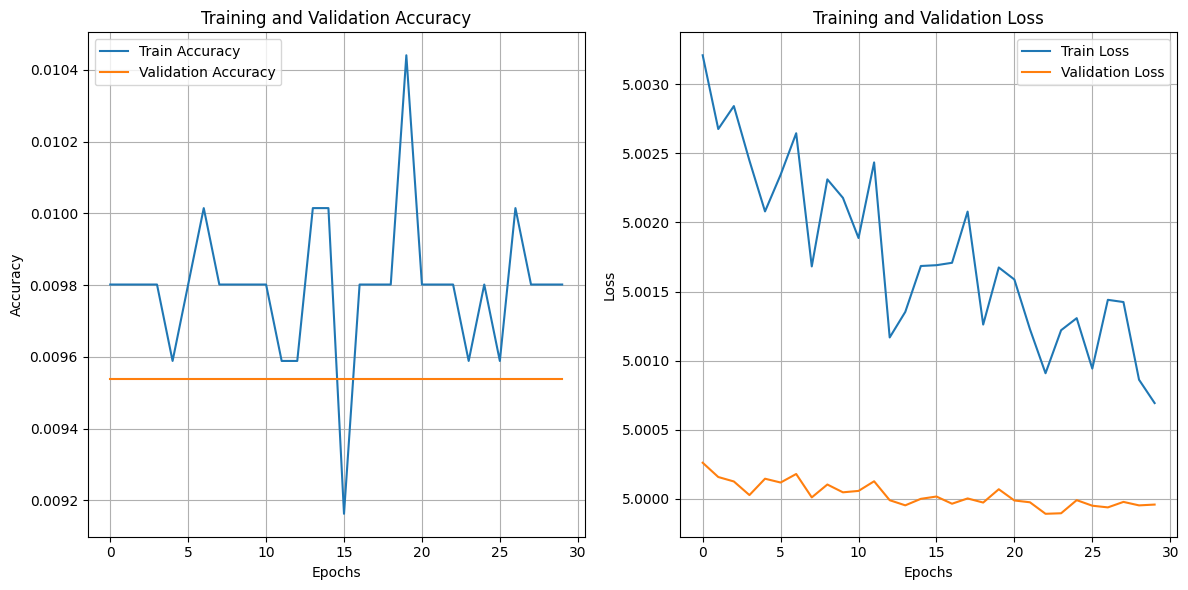

In [ ]:
# Visualization of Accuracy and Loss
def plot_accuracy_and_loss(train_acc, val_acc, train_loss, val_loss):
    # Visualize Accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_acc, label="Train Accuracy")
    plt.plot(val_acc, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.grid(True)

    # Visualize Loss
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label="Train Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Output accuracy and loss graphs
plot_accuracy_and_loss(train_acc, val_acc, train_loss, val_loss)

# VGG pretrained = True

In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
import torchvision.models as models
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
# 데이터 경로
train_dir = '/content/few_shot_classification/code/train'
val_dir = '/content/few_shot_classification/code/val'

# 데이터 변환 (이미지 전처리)
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),          # 이미지 크기 조정
    # transforms.RandomHorizontalFlip(),         # 랜덤 수평 뒤집기
    # transforms.RandomRotation(10),             # 랜덤 회전 (각도 범위: -15 ~ 15도)
    # transforms.RandomCrop(120),               # 이미지의 일부를 랜덤으로 잘라냄 (120x120)
    # transforms.RandomResizedCrop(128, scale=(0.8, 1.0)),  # 랜덤 크기 조절 후 크롭
    # transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # 랜덤 이동 (10%)
    # transforms.RandomPerspective(distortion_scale=0.2, p=0.5), # 원근 왜곡
    # transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)), # 가우시안 블러
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 정규화
])

val_transforms = transforms.Compose([
    transforms.Resize((128, 128)),          # 이미지 크기 조정
    transforms.ToTensor(),                  # 텐서 변환
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 정규화
])

# ImageFolder를 사용해 데이터 로드
train_dataset = ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = ImageFolder(root=val_dir, transform=val_transforms)

# 클래스 확인
print(len(train_dataset.classes))
print(train_dataset.classes)  # 클래스 이름 리스트 출력

# 데이터 로더 생성
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

150
['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking',

In [ ]:
# Set up GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and modify the VGG-16 model
use_pretrained = True  # Use pretrained parameters
vgg16 = models.vgg16(pretrained=use_pretrained)

# Set the number of classes
num_classes = 150  # Define the number of classes

# Modify the classifier part of the VGG-16 model
vgg16.classifier[6] = nn.Linear(vgg16.classifier[6].in_features, num_classes)
vgg16 = vgg16.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.parameters(), lr=0.001)

# Print the model structure
print(vgg16)

# Training and validation loop
num_epochs = 50

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 215MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
def plot_training_results(train_losses, val_losses, train_accuracies, val_accuracies):
    # Loss graph
    plt.figure(figsize=(12, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Accuracy graph
    plt.figure(figsize=(12, 6))
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

classifier.6.weight
classifier.6.bias
--------------------------------------------------
Epoch 1/30


train: 100%|██████████| 147/147 [02:24<00:00,  1.02it/s]


train - Loss: 4.3038, Acc: 0.1300


val: 100%|██████████| 43/43 [00:40<00:00,  1.05it/s]


val - Loss: 3.2739, Acc: 0.3514
Epoch 2/30


train: 100%|██████████| 147/147 [02:21<00:00,  1.04it/s]


train - Loss: 2.8424, Acc: 0.3867


val: 100%|██████████| 43/43 [00:40<00:00,  1.05it/s]


val - Loss: 2.6033, Acc: 0.4960
Epoch 3/30


train: 100%|██████████| 147/147 [02:22<00:00,  1.03it/s]


train - Loss: 2.2444, Acc: 0.5084


val: 100%|██████████| 43/43 [00:41<00:00,  1.04it/s]


val - Loss: 2.2818, Acc: 0.5209
Epoch 4/30


train: 100%|██████████| 147/147 [02:22<00:00,  1.03it/s]


train - Loss: 1.9234, Acc: 0.5672


val: 100%|██████████| 43/43 [00:41<00:00,  1.04it/s]


val - Loss: 2.1062, Acc: 0.5539
Epoch 5/30


train: 100%|██████████| 147/147 [02:22<00:00,  1.03it/s]


train - Loss: 1.6805, Acc: 0.6273


val: 100%|██████████| 43/43 [00:41<00:00,  1.03it/s]


val - Loss: 2.0092, Acc: 0.5517
Epoch 6/30


train: 100%|██████████| 147/147 [02:22<00:00,  1.03it/s]


train - Loss: 1.5581, Acc: 0.6401


val: 100%|██████████| 43/43 [00:41<00:00,  1.03it/s]


val - Loss: 1.9127, Acc: 0.5708
Epoch 7/30


train: 100%|██████████| 147/147 [02:22<00:00,  1.03it/s]


train - Loss: 1.4171, Acc: 0.6797


val: 100%|██████████| 43/43 [00:41<00:00,  1.03it/s]


val - Loss: 1.8570, Acc: 0.5737
Epoch 8/30


train: 100%|██████████| 147/147 [02:22<00:00,  1.03it/s]


train - Loss: 1.3475, Acc: 0.6885


val: 100%|██████████| 43/43 [00:41<00:00,  1.04it/s]


val - Loss: 1.8187, Acc: 0.5818
Epoch 9/30


train: 100%|██████████| 147/147 [02:22<00:00,  1.03it/s]


train - Loss: 1.2647, Acc: 0.7057


val: 100%|██████████| 43/43 [00:41<00:00,  1.05it/s]


val - Loss: 1.7699, Acc: 0.6001
Epoch 10/30


train: 100%|██████████| 147/147 [02:23<00:00,  1.02it/s]


train - Loss: 1.1758, Acc: 0.7300


val: 100%|██████████| 43/43 [00:41<00:00,  1.04it/s]


val - Loss: 1.7550, Acc: 0.5921
Epoch 11/30


train: 100%|██████████| 147/147 [02:25<00:00,  1.01it/s]


train - Loss: 1.1247, Acc: 0.7322


val: 100%|██████████| 43/43 [00:41<00:00,  1.04it/s]


val - Loss: 1.7373, Acc: 0.5965
Epoch 12/30


train: 100%|██████████| 147/147 [02:22<00:00,  1.03it/s]


train - Loss: 1.0441, Acc: 0.7528


val: 100%|██████████| 43/43 [00:42<00:00,  1.02it/s]


val - Loss: 1.7104, Acc: 0.6009
Epoch 13/30


train: 100%|██████████| 147/147 [02:23<00:00,  1.02it/s]


train - Loss: 1.0050, Acc: 0.7616


val: 100%|██████████| 43/43 [00:41<00:00,  1.03it/s]


val - Loss: 1.6977, Acc: 0.5994
Epoch 14/30


train: 100%|██████████| 147/147 [02:23<00:00,  1.03it/s]


train - Loss: 0.9779, Acc: 0.7703


val: 100%|██████████| 43/43 [00:41<00:00,  1.04it/s]


val - Loss: 1.6789, Acc: 0.6112
Epoch 15/30


train: 100%|██████████| 147/147 [02:24<00:00,  1.02it/s]


train - Loss: 0.9494, Acc: 0.7726


val: 100%|██████████| 43/43 [00:41<00:00,  1.05it/s]


val - Loss: 1.6683, Acc: 0.6060
Epoch 16/30


train: 100%|██████████| 147/147 [02:23<00:00,  1.03it/s]


train - Loss: 0.9077, Acc: 0.7852


val: 100%|██████████| 43/43 [00:41<00:00,  1.03it/s]


val - Loss: 1.6512, Acc: 0.6075
Epoch 17/30


train: 100%|██████████| 147/147 [02:23<00:00,  1.03it/s]


train - Loss: 0.8667, Acc: 0.7963


val: 100%|██████████| 43/43 [00:41<00:00,  1.03it/s]


val - Loss: 1.6400, Acc: 0.6082
Epoch 18/30


train: 100%|██████████| 147/147 [02:23<00:00,  1.02it/s]


train - Loss: 0.8291, Acc: 0.8138


val: 100%|██████████| 43/43 [00:41<00:00,  1.03it/s]


val - Loss: 1.6343, Acc: 0.6038
Epoch 19/30


train: 100%|██████████| 147/147 [02:22<00:00,  1.03it/s]


train - Loss: 0.8342, Acc: 0.7971


val: 100%|██████████| 43/43 [00:41<00:00,  1.04it/s]


val - Loss: 1.6305, Acc: 0.6060
Epoch 20/30


train: 100%|██████████| 147/147 [02:24<00:00,  1.02it/s]


train - Loss: 0.7965, Acc: 0.8127


val: 100%|██████████| 43/43 [00:41<00:00,  1.03it/s]


val - Loss: 1.6331, Acc: 0.6097
Epoch 21/30


train: 100%|██████████| 147/147 [02:23<00:00,  1.02it/s]


train - Loss: 0.7653, Acc: 0.8155


val: 100%|██████████| 43/43 [00:41<00:00,  1.04it/s]


val - Loss: 1.6220, Acc: 0.6170
Epoch 22/30


train: 100%|██████████| 147/147 [02:24<00:00,  1.02it/s]


train - Loss: 0.7502, Acc: 0.8214


val: 100%|██████████| 43/43 [00:42<00:00,  1.02it/s]


val - Loss: 1.6245, Acc: 0.6141
Epoch 23/30


train: 100%|██████████| 147/147 [02:23<00:00,  1.03it/s]


train - Loss: 0.7166, Acc: 0.8325


val: 100%|██████████| 43/43 [00:42<00:00,  1.02it/s]


val - Loss: 1.6140, Acc: 0.6163
Epoch 24/30


train: 100%|██████████| 147/147 [02:23<00:00,  1.02it/s]


train - Loss: 0.7093, Acc: 0.8353


val: 100%|██████████| 43/43 [00:41<00:00,  1.04it/s]


val - Loss: 1.6146, Acc: 0.6141
Epoch 25/30


train: 100%|██████████| 147/147 [02:24<00:00,  1.02it/s]


train - Loss: 0.6774, Acc: 0.8391


val: 100%|██████████| 43/43 [00:42<00:00,  1.01it/s]


val - Loss: 1.6078, Acc: 0.6163
Epoch 26/30


train: 100%|██████████| 147/147 [02:23<00:00,  1.03it/s]


train - Loss: 0.6570, Acc: 0.8466


val: 100%|██████████| 43/43 [00:42<00:00,  1.02it/s]


val - Loss: 1.5970, Acc: 0.6104
Epoch 27/30


train: 100%|██████████| 147/147 [02:24<00:00,  1.02it/s]


train - Loss: 0.6451, Acc: 0.8472


val: 100%|██████████| 43/43 [00:41<00:00,  1.04it/s]


val - Loss: 1.6076, Acc: 0.6067
Epoch 28/30


train: 100%|██████████| 147/147 [02:24<00:00,  1.02it/s]


train - Loss: 0.6379, Acc: 0.8577


val: 100%|██████████| 43/43 [00:42<00:00,  1.02it/s]


val - Loss: 1.5983, Acc: 0.6119
Epoch 29/30


train: 100%|██████████| 147/147 [02:23<00:00,  1.02it/s]


train - Loss: 0.6274, Acc: 0.8553


val: 100%|██████████| 43/43 [00:41<00:00,  1.04it/s]


val - Loss: 1.5839, Acc: 0.6163
Epoch 30/30


train: 100%|██████████| 147/147 [02:23<00:00,  1.03it/s]


train - Loss: 0.5972, Acc: 0.8626


val: 100%|██████████| 43/43 [00:42<00:00,  1.02it/s]


val - Loss: 1.5838, Acc: 0.6126


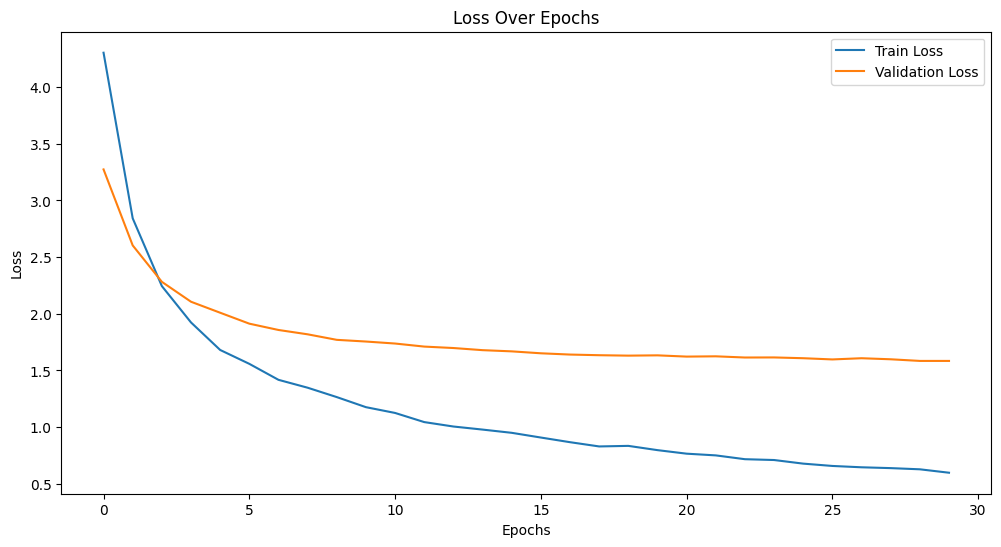

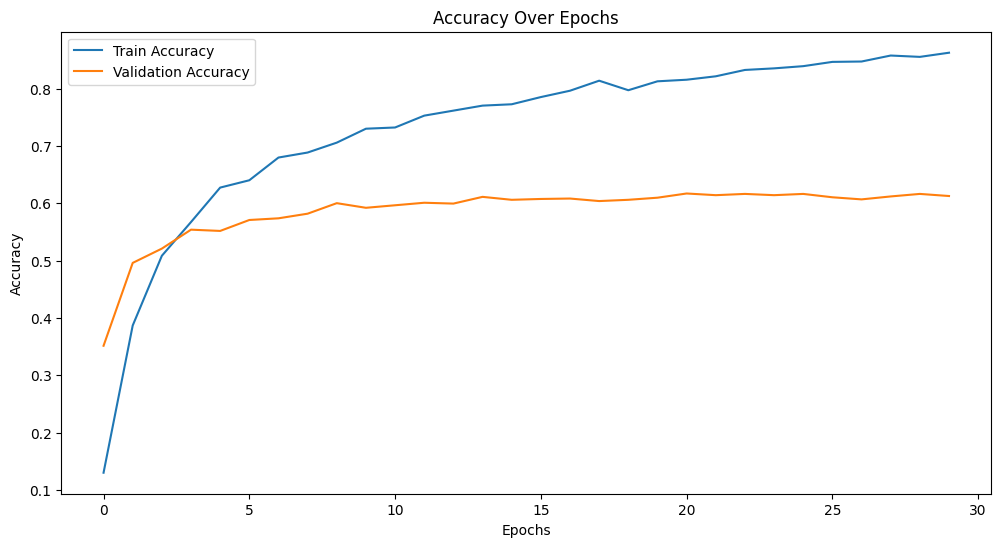

In [ ]:
dataloaders_dict = {'train': train_loader, 'val': val_loader}

# Verify operation
batch_iterator = iter(dataloaders_dict['train'])
inputs, labels = next(batch_iterator)

# Load pretrained VGG-16 model
# Create an instance of VGG-16
use_pretrained = True
net = models.vgg16(pretrained=use_pretrained)

# Modify the last layer of the classifier to output 150 classes
net.classifier[6] = nn.Linear(in_features=4096, out_features=150)

# Set the model to training mode
net.train()

# Define the loss function
criterion = nn.CrossEntropyLoss()

params_to_update = []

# Parameters to train
update_param_names = ['classifier.6.weight', 'classifier.6.bias']

# Set requires_grad=False for all parameters except those to be updated
for name, param in net.named_parameters():
    if name in update_param_names:
        param.requires_grad = True
        params_to_update.append(param)
        print(name)
    else:
        param.requires_grad = False

# Check the contents of params_to_update
print('-' * 50)

# Use optimization techniques
optimizer = optim.SGD(params=params_to_update, lr=0.001, momentum=0.9)

## Training and validation
def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):
    # Initialize lists to store losses and accuracies
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    best_val_loss = float("inf")
    patience_counter = 0  # Early stopping counter

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")

        # Always proceed in the order of train -> val
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train()
            else:
                net.eval()

            epoch_loss = 0.0
            epoch_corrects = 0

            # Process batches using the data loader
            for inputs, labels in tqdm(dataloaders_dict[phase], desc=f"{phase}"):
                optimizer.zero_grad()

                # Forward pass and loss calculation
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    # Backward pass and weight updates during training
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Calculate loss and accuracy
                epoch_loss += loss.item() * inputs.size(0)
                epoch_corrects += torch.sum(preds == labels.data)

            epoch_loss /= len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double() / len(dataloaders_dict[phase].dataset)

            print(f"{phase} - Loss: {epoch_loss:.4f}, Acc: {epoch_acc:.4f}")

            # Store losses and accuracies
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc.item())
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc.item())

                # Check early stopping condition
                if epoch_loss < best_val_loss:
                    best_val_loss = epoch_loss
                    patience_counter = 0  # Reset counter if validation loss improves
                else:
                    patience_counter += 1  # Increment counter if no improvement

    # Visualize training results
    plot_training_results(train_losses, val_losses, train_accuracies, val_accuracies)

num_epochs = 30
train_model(net, dataloaders_dict, criterion, optimizer, num_epochs=num_epochs)